<a href="https://colab.research.google.com/github/aksonajswl/DS-2-solution/blob/main/DS_2_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**In this project,**
 we aim to compare multiple classification models by training them on a dataset and evaluating their performance using metrics like accuracy, precision, recall, and F1-score.
We'll also apply hyper-parameter tuning (like Grid Search) to optimize each model. Finally, we'll build a dashboard to compare model performances with and without tuning to see the impact clearly.


# **About Dataset**

Telcom Customer Churn
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

link - https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [48]:
import pandas as pd

df = pd.read_csv('/content/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.shape


(7043, 20)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [11]:
df.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [12]:
from sklearn.preprocessing import LabelEncoder


cat_cols = df.select_dtypes(include='object').columns


le = LabelEncoder()


for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


df[['MonthlyCharges', 'TotalCharges', 'tenure']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges', 'tenure']])

df.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.398608,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.948762,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-1.641883,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.983710,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-1.235224,1


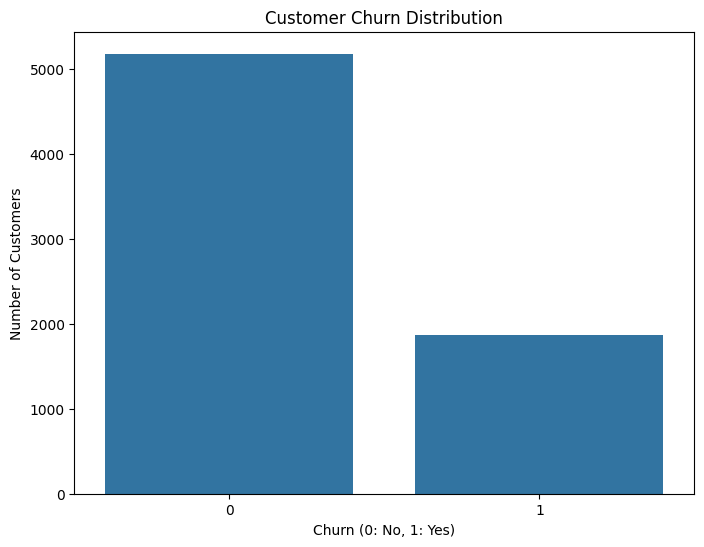

Churn
0    5174
1    1869
Name: count, dtype: int64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns



churn_counts = df['Churn'].value_counts()


plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Number of Customers')
plt.show()


print(churn_counts)


**Clearly its showing Data is imbalanced so we need to Apply SMOTE beform modeling**

# **Splitting into training and testing sets (80/20 split) And Applying SMOTE**

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop(columns='Churn')
y = df['Churn']

#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Applying SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



# **Model Training** **& Model Evaluation**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Logistic Regression Results:
Accuracy: 0.7551
Precision: 0.5244
Recall: 0.8070
F1 Score: 0.6357
R2 Score: -0.2579
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1036
           1       0.52      0.81      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



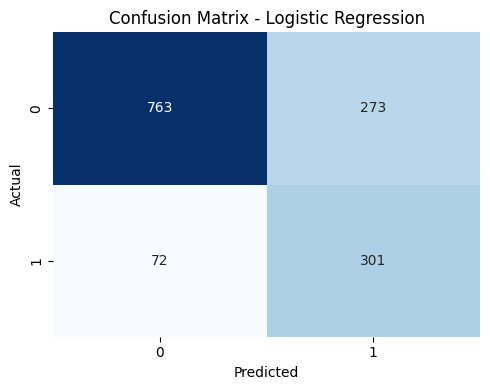

Random Forest Results:
Accuracy: 0.7736
Precision: 0.5649
Recall: 0.6300
F1 Score: 0.5957
R2 Score: -0.1631
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1036
           1       0.56      0.63      0.60       373

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.78      1409



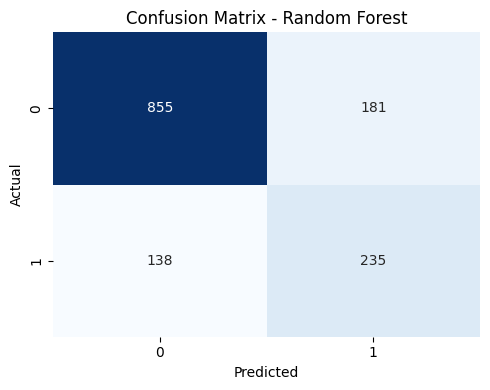

Support Vector Machine Results:
Accuracy: 0.7566
Precision: 0.5274
Recall: 0.7748
F1 Score: 0.6276
R2 Score: -0.2507
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



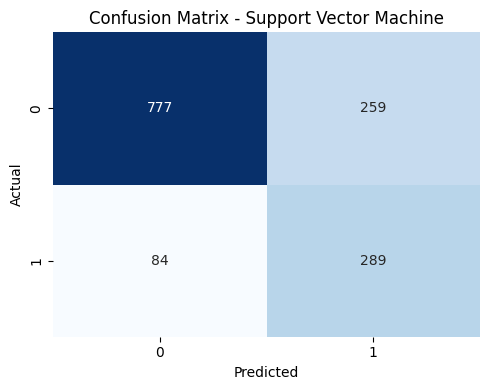

Gradient Boosting Results:
Accuracy: 0.7551
Precision: 0.5246
Recall: 0.7989
F1 Score: 0.6334
R2 Score: -0.2579
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1036
           1       0.52      0.80      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.76      0.77      1409



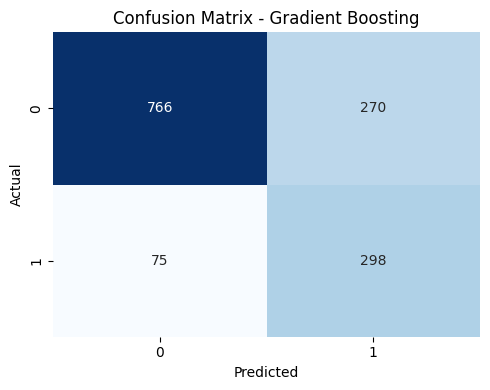

Decision Tree Results:
Accuracy: 0.7111
Precision: 0.4615
Recall: 0.5469
F1 Score: 0.5006
R2 Score: -0.4840
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1036
           1       0.46      0.55      0.50       373

    accuracy                           0.71      1409
   macro avg       0.64      0.66      0.65      1409
weighted avg       0.73      0.71      0.72      1409



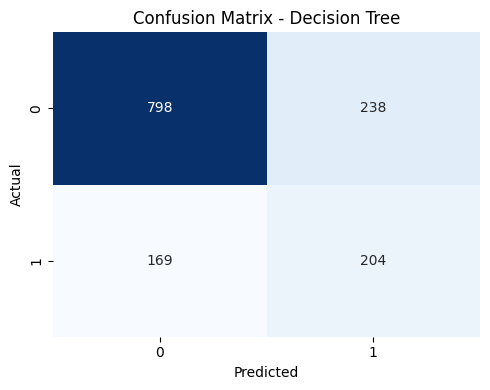

K-Nearest Neighbors Results:
Accuracy: 0.7260
Precision: 0.4884
Recall: 0.7346
F1 Score: 0.5867
R2 Score: -0.4074
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.72      0.80      1036
           1       0.49      0.73      0.59       373

    accuracy                           0.73      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.78      0.73      0.74      1409



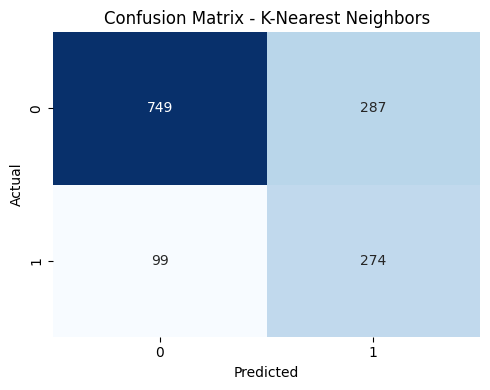

Naive Bayes Results:
Accuracy: 0.7452
Precision: 0.5119
Recall: 0.8043
F1 Score: 0.6257
R2 Score: -0.3090
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1036
           1       0.51      0.80      0.63       373

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.81      0.75      0.76      1409



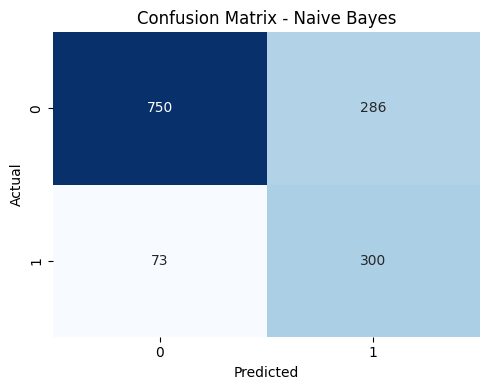

XGBoost Results:
Accuracy: 0.7672
Precision: 0.5508
Recall: 0.6542
F1 Score: 0.5980
R2 Score: -0.1960
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1036
           1       0.55      0.65      0.60       373

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409



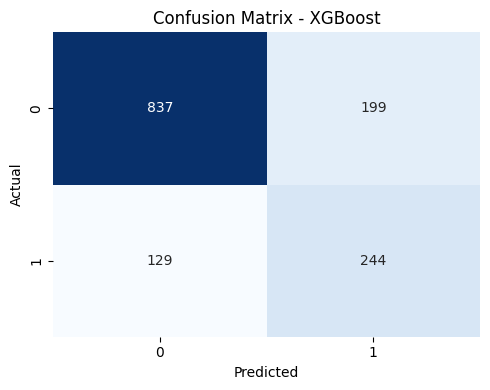

In [18]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

#To store evaluation metrics
results = []

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled) #Training on resampled data


    #Prediction (Untouched Data)
    y_pred = model.predict(X_test)


    #Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    r2 = r2_score(y_test, y_pred)


    results.append({
      'Model': name,
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall,
      'F1 Score': f1,
      'R2 Score': r2
    })

    #Printing the Metrics

    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"R2 Score: {r2:.4f}")


    print("Classification Report:")
    print(classification_report(y_test, y_pred))



    #Ploting Confusion Metrics
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


In [19]:
metrics_df = pd.DataFrame(results)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,R2 Score
0,Logistic Regression,0.755145,0.524390,0.806971,0.635692,-0.257945
1,Random Forest,0.773598,0.564904,0.630027,0.595691,-0.163143
2,Support Vector Machine,0.756565,0.527372,0.774799,0.627579,-0.250652
3,Gradient Boosting,0.755145,0.524648,0.798928,0.633369,-0.257945
4,Decision Tree,0.711143,0.461538,0.546917,0.500613,-0.484010
5,K-Nearest Neighbors,0.726047,0.488414,0.734584,0.586724,-0.407439
6,Naive Bayes,0.745209,0.511945,0.804290,0.625652,-0.308992
7,XGBoost,0.767211,0.550790,0.654155,0.598039,-0.195959


# **Comparison of Model Evaluation Metrics**

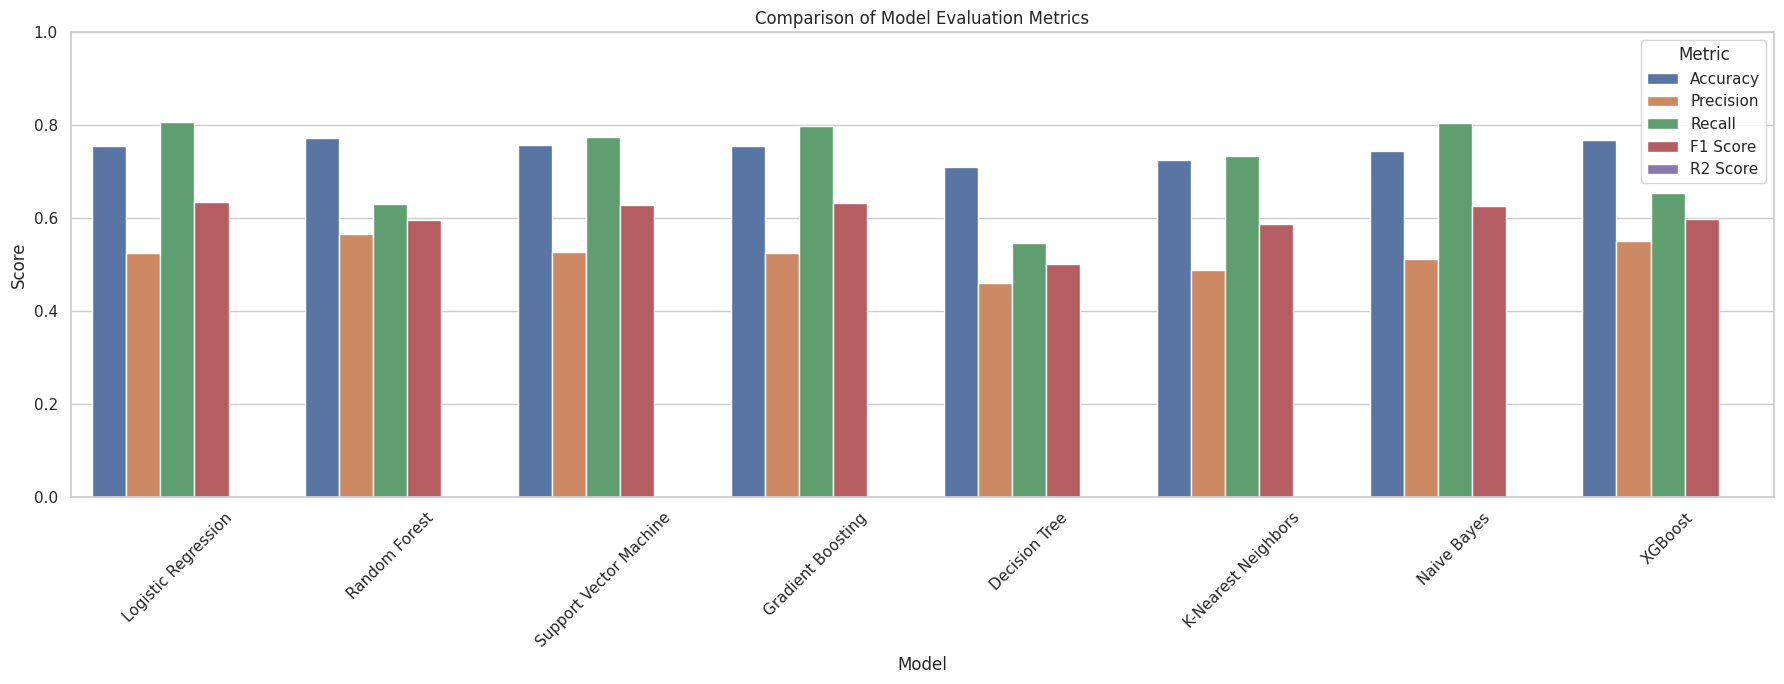

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(18, 7))

metrics_melted = metrics_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'R2 Score'], var_name='Metric', value_name='Score')


sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric')

plt.title('Comparison of Model Evaluation Metrics')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.tight_layout()


plt.show()


In [51]:
best_model_before_tuning = metrics_df.sort_values(by='F1 Score', ascending=False).iloc[0]
print("Best Model Before Tuning:", best_model_before_tuning['Model'])

Best Model Before Tuning: Logistic Regression


# **Hyper-Parameter Tuning**

In [23]:
from sklearn.model_selection import GridSearchCV

 **Seting Models and Hyperparameter Grids**

In [25]:
models = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000, class_weight='balanced'),
        {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'saga']
        }
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    ),
    "Support Vector Machine": (
        SVC(probability=True, class_weight='balanced'),
        {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    ),
    "Gradient Boosting": (
        GradientBoostingClassifier(),
        {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    ),
    "Decision Tree": (
        DecisionTreeClassifier(),
        {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    ),
    "K-Nearest Neighbors": (
        KNeighborsClassifier(),
        {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    ),
    "Naive Bayes": (
        GaussianNB(),
        {}  # No hyperparameters to tune here
    ),
    "XGBoost": (
        XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    )
}


In [28]:
#GridSearchCV for all model

best_models = {}

for name, (model, params) in models.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train_resampled, y_train_resampled)  # Uning X_train_resampled, y_train_resampledif (due to unbalanced data[SMOTE])
    best_models[name] = grid.best_estimator_
    print(f"Best Params for {name}: {grid.best_params_}")
    print("-" * 50)

Tuning Logistic Regression...
Best Params for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
--------------------------------------------------
Tuning Random Forest...
Best Params for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
--------------------------------------------------
Tuning Support Vector Machine...
Best Params for Support Vector Machine: {'C': 10, 'kernel': 'rbf'}
--------------------------------------------------
Tuning Gradient Boosting...
Best Params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
--------------------------------------------------
Tuning Decision Tree...
Best Params for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
--------------------------------------------------
Tuning K-Nearest Neighbors...
Best Params for K-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'distance'}
--------------------------------------------------
Tuning Naive Bayes...
Best Params for Naive B

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
--------------------------------------------------


In [38]:
tuned_results = []


for name, model in best_models.items():
    y_pred = model.predict(X_test)

    tuned_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'R2 Score': r2_score(y_test, y_pred)
    })


tuned_metrics_df = pd.DataFrame(tuned_results)


tuned_metrics_df


,Model,Accuracy,Precision,Recall,F1 Score,R2 Score
0,Logistic Regression,0.754436,0.523560,0.804290,0.634249,-0.261591
1,Random Forest,0.774308,0.565012,0.640751,0.600503,-0.159497
2,Support Vector Machine,0.762952,0.538922,0.723861,0.617849,-0.217836
3,Gradient Boosting,0.773598,0.557203,0.705094,0.622485,-0.163143
4,Decision Tree,0.733854,0.498127,0.713137,0.586549,-0.367331
5,K-Nearest Neighbors,0.711143,0.466535,0.635389,0.538025,-0.484010
6,Naive Bayes,0.745209,0.511945,0.804290,0.625652,-0.308992
7,XGBoost,0.778566,0.561368,0.747989,0.641379,-0.137619


In [41]:
comparison_df = metrics_df.set_index('Model').join(
    tuned_metrics_df.set_index('Model'),
    lsuffix='_Original', rsuffix='_Tuned'
)

comparison_df.reset_index(inplace=True)

comparison_df


,Model,Accuracy_Original,Precision_Original,Recall_Original,F1 Score_Original,R2 Score_Original,Accuracy_Tuned,Precision_Tuned,Recall_Tuned,F1 Score_Tuned,R2 Score_Tuned
0,Logistic Regression,0.755145,0.524390,0.806971,0.635692,-0.257945,0.754436,0.523560,0.804290,0.634249,-0.261591
1,Random Forest,0.773598,0.564904,0.630027,0.595691,-0.163143,0.774308,0.565012,0.640751,0.600503,-0.159497
2,Support Vector Machine,0.756565,0.527372,0.774799,0.627579,-0.250652,0.762952,0.538922,0.723861,0.617849,-0.217836
3,Gradient Boosting,0.755145,0.524648,0.798928,0.633369,-0.257945,0.773598,0.557203,0.705094,0.622485,-0.163143
4,Decision Tree,0.711143,0.461538,0.546917,0.500613,-0.484010,0.733854,0.498127,0.713137,0.586549,-0.367331
5,K-Nearest Neighbors,0.726047,0.488414,0.734584,0.586724,-0.407439,0.711143,0.466535,0.635389,0.538025,-0.484010
6,Naive Bayes,0.745209,0.511945,0.804290,0.625652,-0.308992,0.745209,0.511945,0.804290,0.625652,-0.308992
7,XGBoost,0.767211,0.550790,0.654155,0.598039,-0.195959,0.778566,0.561368,0.747989,0.641379,-0.137619


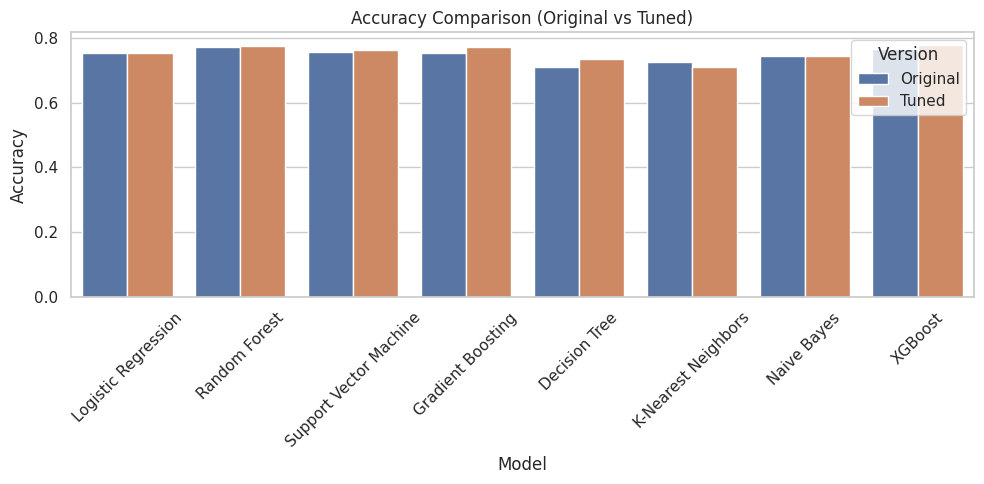

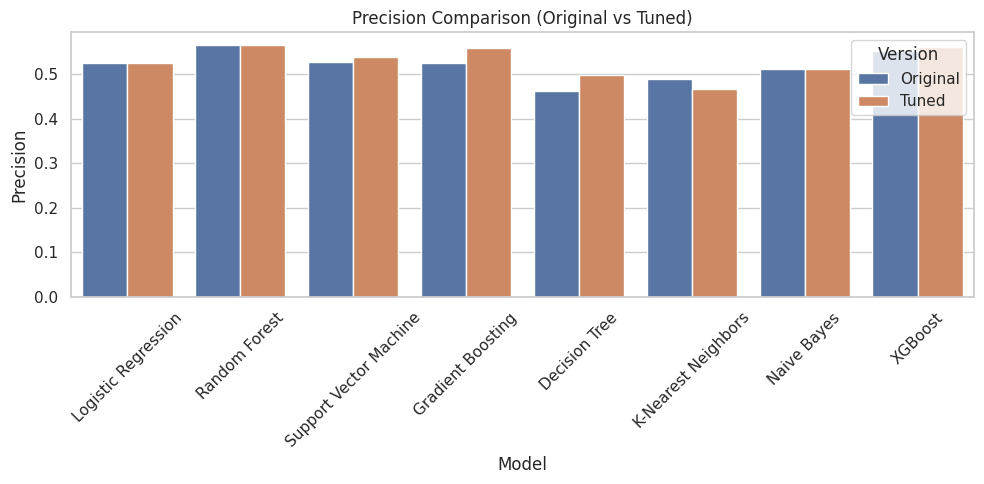

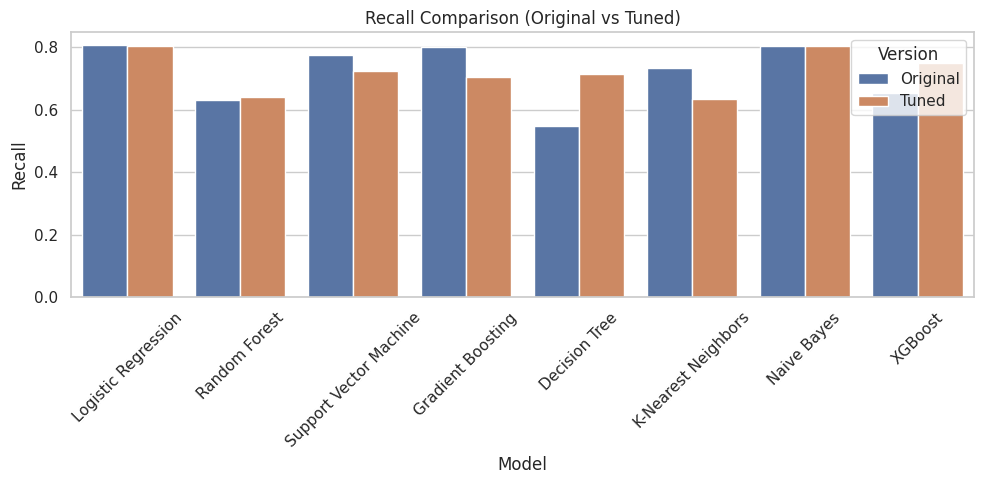

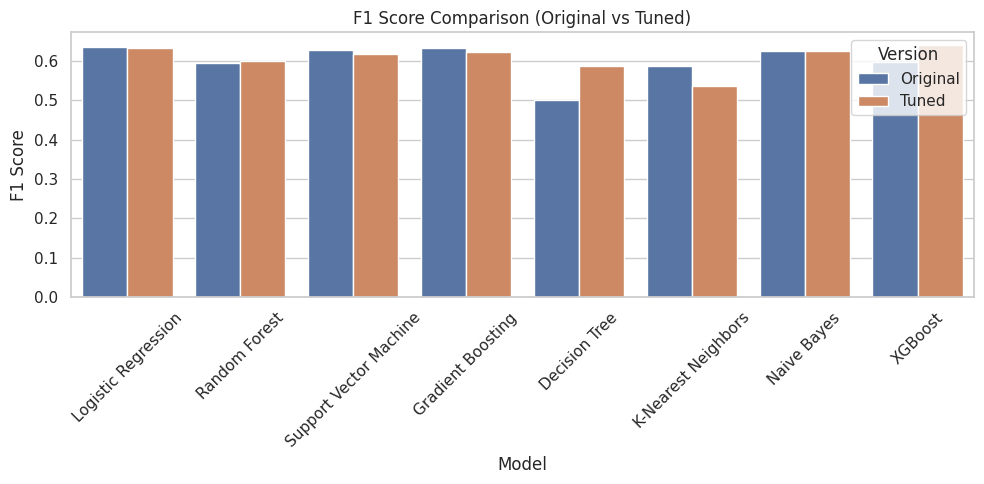

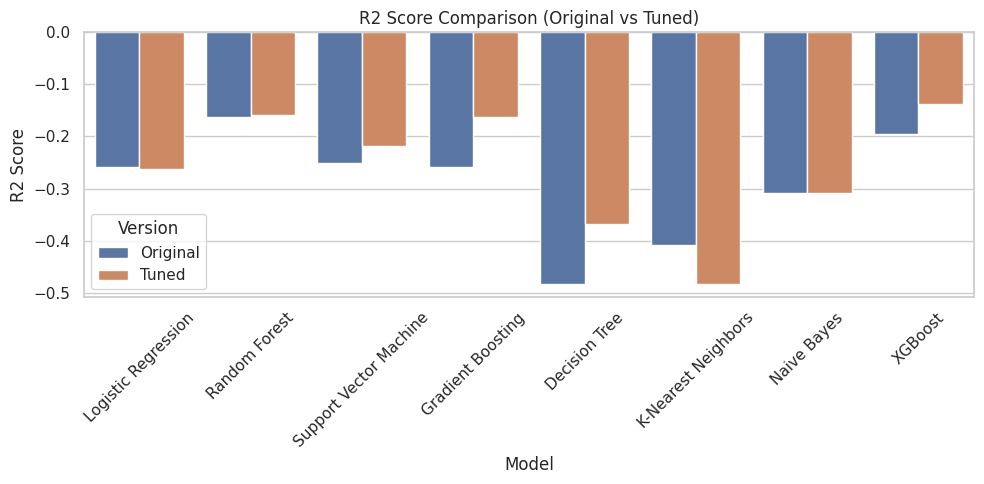

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'R2 Score']


for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))


    melted = comparison_df[['Model', f'{metric}_Original', f'{metric}_Tuned']].melt(id_vars='Model', var_name='Version',value_name=metric)


    melted['Version'] = melted['Version'].apply(lambda x: x.replace(f"{metric}_", ""))

    sns.barplot(data=melted, x='Model', y=metric, hue='Version')
    plt.title(f'{metric} Comparison (Original vs Tuned)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# **Best Model Before and After Tuning**

In [53]:
best_model_before_tuning = metrics_df.sort_values(by='F1 Score', ascending=False).iloc[0]
print("Best Model Before Tuning:", best_model_before_tuning['Model'])



best_model_after_tuning = tuned_metrics_df.sort_values(by='F1 Score', ascending=False).iloc[0]
print("Best Model After tuning:", best_model_after_tuning['Model'])

Best Model Before Tuning: Logistic Regression
Best Model After tuning: XGBoost


# **Conclusion:**
Before tuning, Logistic Regression performed the best among all models, indicating strong baseline performance with minimal configuration. However, after applying hyperparameter tuning, XGBoost emerged as the top-performing model, showcasing its ability to significantly improve with optimization.
This highlights the importance of model tuning in achieving optimal results and suggests that while simpler models can perform well initially, more complex models like XGBoost can outperform when properly tuned.

# **And that’s the full pipeline — from raw data to optimized model.**



1).  Cleaning and preparing data

2).  Handling imbalance

3).  Evaluating and tuning models

